### Airbnb Price Analysis and Prediction using Deep Learning Algorithms.
Team Members:  
Dingari, Vikram - 700742014  
Shruthi Vallap Reddy - 700744517  
Cherukupally, Ashwin Kumar Reddy - 700745488  
Kadali, Satya Ishyanth - 700735513  

The motivation behind building an Airbnb price prediction model using Bi-LSTM is to help hosts and property managers maximize their revenue and maintain occupancy rates. Determining the optimal price for a rental property can be a complex task that involves considering various factors such as location, property type, amenities, and demand. By building a model that predicts the price of an Airbnb listing, hosts can set the right prices and increase their earnings.  


In [1]:
# importing libraries
import os
import pickle
import re
import warnings
from pickle import dump

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau
from prettytable import PrettyTable

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#1.Collecting the data
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/My Drive/datas/New York Airbnb_4 dec 2021.csv',encoding = "ISO-8859-1")


Mounted at /content/drive


In [4]:
# displaying top-5 rows and properties of the dataset
print("Top-5 rows of the dataset")
display(dataset.head())

Top-5 rows of the dataset


id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5136           Spacious Brooklyn Duplex, Patio + Garden     7378   
4  5178                 Large Furnished Room Near B'wayã     8967   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Jennifer           Manhattan             Midtown  40.75356  -73.98559   
1  LisaRoxanne            Brooklyn  Bedford-Stuyvesant  40.68494  -73.95765   
2        Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
3      Rebecca            Brooklyn         Sunset Park  40.66265  -73.99454   
4     Shunichi           Manhattan             Midtown  40.76457  -73.98317   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    150              30                 48  2019-11-04   
1  Entire home/apt     75               1                409  2021-10-22   
2     Private room     60              30                 50  2016-06-05   
3  Entire home/apt    275               5                  2  2021-08-08   
4     Private room     68               2                507  2021-11-08   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.33                               3               338   
1               4.86                               1               194   
2               0.52                               2               365   
3               0.02                               1               123   
4               3.68                               1               192   

   number_of_reviews_ltm license  
0                      0     NaN  
1                     32     NaN  
2                      0     NaN  
3                      1     NaN  
4                     33     NaN

In [5]:
row, col = dataset.shape
print(f"The number of rows and columns in the dataset: {row} and {col}")

The number of rows and columns in the dataset: 38277 and 18


In [6]:
print('Descriptive analysis of the dataset')
display(dataset.describe())

Descriptive analysis of the dataset


id       host_id      latitude     longitude         price  \
count  3.827700e+04  3.827700e+04  38277.000000  38277.000000  38277.000000   
mean   2.962239e+07  1.148305e+08     40.729206    -73.948967    170.858714   
std    1.742239e+07  1.299194e+08      0.055752      0.050759    305.100271   
min    2.595000e+03  2.438000e+03     40.504560    -74.249840      0.000000   
25%    1.341048e+07  1.139462e+07     40.689260    -73.983270     70.000000   
50%    3.081269e+07  5.005297e+07     40.725180    -73.954770    114.000000   
75%    4.642855e+07  2.002395e+08     40.762680    -73.930430    189.000000   
max    5.366510e+07  4.344080e+08     40.914020    -73.710870  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    38277.000000       38277.000000       28773.000000   
mean        21.623769          23.302871           1.721019   
std         29.573333          50.415484           4.399826   
min          1.000000           0.000000           0.010000   
25%          3.000000           1.000000           0.120000   
50%         30.000000           4.000000           0.480000   
75%         30.000000          20.000000           1.780000   
max       1250.000000        1009.000000         141.000000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    38277.000000      38277.000000           38277.000000  
mean                        17.747655        134.290984               5.032160  
std                         59.150451        143.196175              14.693768  
min                          1.000000          0.000000               0.000000  
25%                          1.000000          0.000000               0.000000  
50%                          1.000000         73.000000               0.000000  
75%                          3.000000        302.000000               3.000000  
max                        421.000000        365.000000             669.000000

In [7]:
print(f'Columns in the datasets are : {list(dataset.columns)}')

Columns in the datasets are : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']


In [8]:
# preprocessing datasets
# checking for the missing values
preprocessDataframe = dataset.isnull().sum(axis=0).reset_index()
preprocessDataframe.columns = ['column', 'count']
preprocessDataframe = preprocessDataframe.loc[preprocessDataframe['count'] > 0].sort_values(by='count')
print('Displaying columns with number of count')
display(preprocessDataframe)

Displaying columns with number of count


column  count
1                name     13
3           host_name     34
12        last_review   9504
13  reviews_per_month   9504
17            license  38276

In [9]:
# dropping unwanted columns
dataset.drop(['host_name','name','host_id','id','license','number_of_reviews_ltm'], axis=1, inplace=True)

In [10]:
dataset['last_review'] = pd.to_datetime(dataset['last_review'],infer_datetime_format=True) 

In [11]:
# filling dataframe
dataset['reviews_per_month'] = dataset['reviews_per_month'].fillna(0)
earliest = min(dataset['last_review'])
dataset['last_review'] = dataset['last_review'].fillna(earliest)
dataset['last_review'] = dataset['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())

In [12]:
# checking for the missing values post preprocessing
print('\nDisplaying columns with number of count post preprocessing')
display(dataset.isna().any())


Displaying columns with number of count post preprocessing


neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [13]:
# dataset post preprocessing
dataset.head()

neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75356  -73.98559   
1            Brooklyn  Bedford-Stuyvesant  40.68494  -73.95765   
2            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
3            Brooklyn         Sunset Park  40.66265  -73.99454   
4           Manhattan             Midtown  40.76457  -73.98317   

         room_type  price  minimum_nights  number_of_reviews  last_review  \
0  Entire home/apt    150              30                 48         3240   
1  Entire home/apt     75               1                409         3958   
2     Private room     60              30                 50         1993   
3  Entire home/apt    275               5                  2         3883   
4     Private room     68               2                507         3975   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.33                               3               338  
1               4.86                               1               194  
2               0.52                               2               365  
3               0.02                               1               123  
4               3.68                               1               192

Text(0.5, 0, 'log(1+price)')

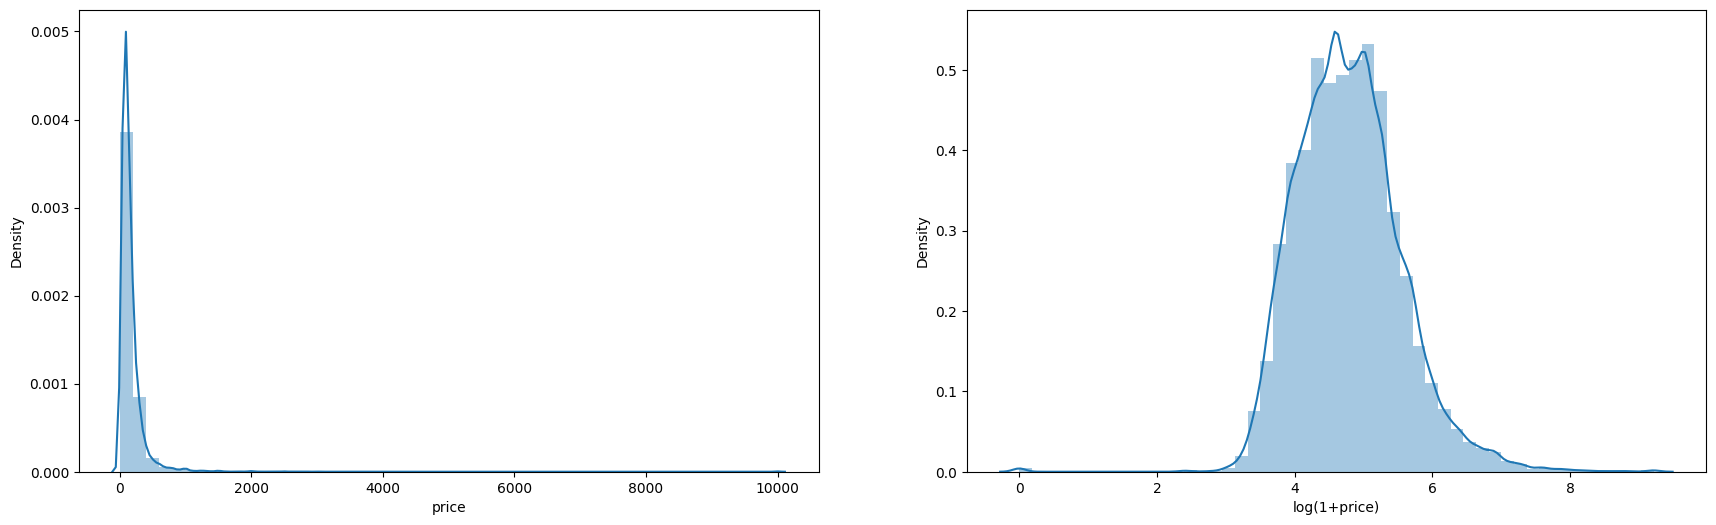

In [14]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(dataset['price'], ax=axes[0])
sns.distplot(np.log1p(dataset['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')

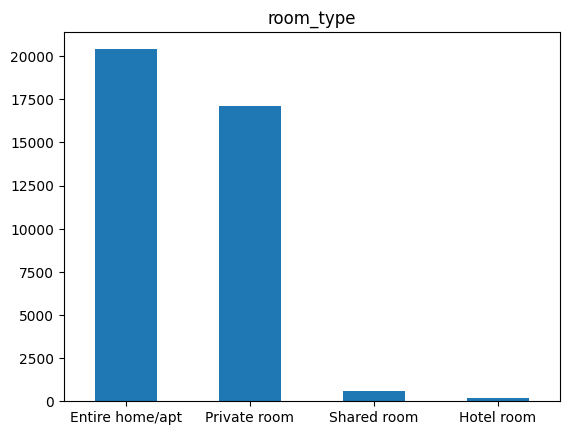

In [15]:
dataset['room_type'].value_counts().plot(kind='bar')
plt.title('room_type')
plt.xticks(rotation=0)
plt.show()

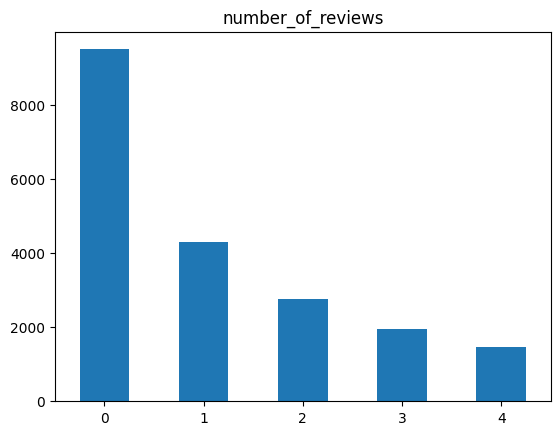

In [16]:
dataset['number_of_reviews'].value_counts().nlargest(5).plot(kind='bar')
plt.title('number_of_reviews')
plt.xticks(rotation=0)
plt.show()


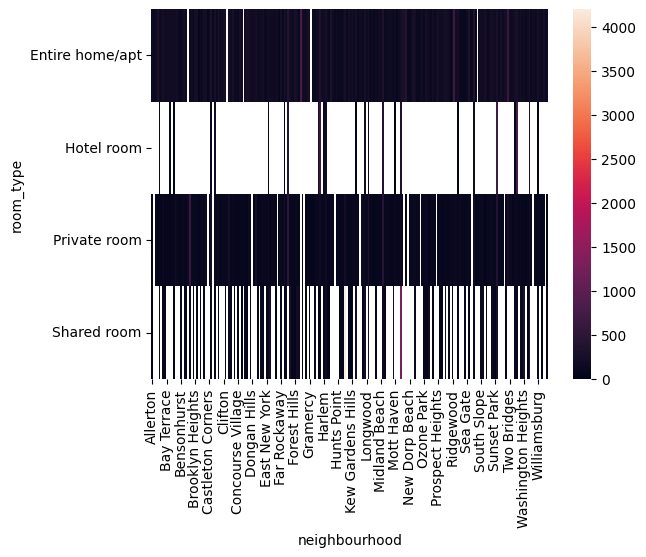

In [17]:
# correlation of the dataset
sns.heatmap(dataset.pivot_table(values='price', index='room_type', columns='neighbourhood'))
plt.show()

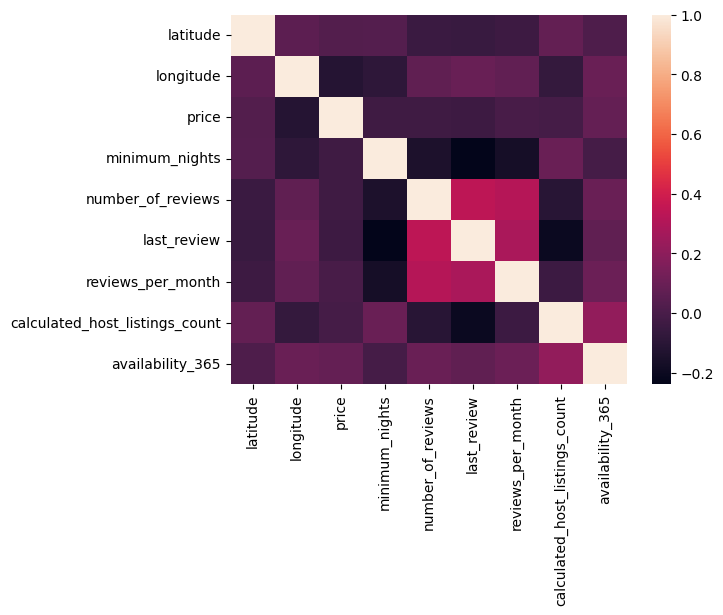

In [18]:
# correlation of the dataset
sns.heatmap(dataset.corr())
plt.show()

In [19]:
categorical_features = dataset.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (38277, 3)


In [20]:
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             0   
1                          0                             1   
2                          0                             1   
3                          0                             1   
4                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              1                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  neighbourhood_Allerton  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   

   neighbourhood_Arden Heights  neighbourhood_Arrochar  neighbourhood_Arverne  \
0                            0                       0                      0   
1                            0                       0                      0   
2                            0                       0                      0   
3                            0                       0                      0   
4                            0                       0                      0   

   neighbourhood_Astoria  ...  neighbourhood_Williamsburg  \
0                      0  ...                           0   
1                      0  ...                           0   
2                      0  ...                           0   
3                      0  ...                           0   
4                      0  ...                           0   

   neighbourhood_Windsor Terrace  neighbourhood_Woodhaven  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   neighbourhood_Woodlawn  neighbourhood_Woodrow  neighbourhood_Woodside  \
0                       0                      0                       0   
1                       0                      0                       0   
2                       0                      0                       0   
3                       0                      0                       0   
4                       0                      0                       0   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
0                          1                     0                       0   
1                          1                     0                       0   
2                          0                     0                       1   
3                          1                     0                       0   
4                          0                     0                       1   

   room_type_Shared room  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 231 columns]

In [21]:
numerical_features =  dataset.select_dtypes(exclude=['object'])
y = numerical_features.price
numerical_features = numerical_features.drop(['price'], axis=1)
print('Numerical features: {}'.format(numerical_features.shape))

Numerical features: (38277, 8)


In [22]:
X = np.concatenate((numerical_features, categorical_features_one_hot), axis=1)
df = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

In [23]:
Processed_data = pd.concat([df, y], axis = 1)
Processed_data.to_csv('NYC_Airbnb_Processed.csv')

In [24]:
Processed_data.head()

latitude  longitude  minimum_nights  number_of_reviews  last_review  \
0  40.75356  -73.98559              30                 48         3240   
1  40.68494  -73.95765               1                409         3958   
2  40.68535  -73.95512              30                 50         1993   
3  40.66265  -73.99454               5                  2         3883   
4  40.76457  -73.98317               2                507         3975   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.33                               3               338   
1               4.86                               1               194   
2               0.52                               2               365   
3               0.02                               1               123   
4               3.68                               1               192   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  ...  \
0                          0                             0  ...   
1                          0                             1  ...   
2                          0                             1  ...   
3                          0                             1  ...   
4                          0                             0  ...   

   neighbourhood_Windsor Terrace  neighbourhood_Woodhaven  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   neighbourhood_Woodlawn  neighbourhood_Woodrow  neighbourhood_Woodside  \
0                       0                      0                       0   
1                       0                      0                       0   
2                       0                      0                       0   
3                       0                      0                       0   
4                       0                      0                       0   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
0                          1                     0                       0   
1                          1                     0                       0   
2                          0                     0                       1   
3                          1                     0                       0   
4                          0                     0                       1   

   room_type_Shared room  price  
0                      0    150  
1                      0     75  
2                      0     60  
3                      0    275  
4                      0     68  

[5 rows x 240 columns]

In [25]:
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

print(f"The shapes of the train dataset is {X_train.shape}")
print(f"The shapes of the test dataset is {X_test.shape}")


The shapes of the train dataset is (28707, 239)
The shapes of the test dataset is (9570, 239)


In [26]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
def result_matric(Algo_name,y_pred_train,y_pred_test,y_train=y_train,y_test=y_test):
    result = pd.DataFrame({'Algorithm': [Algo_name],
                  'Mean absolute error (MAE) : Train' : [mean_absolute_error(y_pred_train, y_train)],
                  'Root mean squared error (RMSE) : Train' : np.sqrt([mean_squared_error(y_pred_train, y_train)]),
                  'R-square score (R^2) : Train' : [r2_score(y_pred_train, y_train)],
                  'Mean absolute error (MAE) : Test' : [mean_absolute_error(y_pred_test,y_test)],
                  'Root mean squared error (RMSE) : Test' : np.sqrt([mean_squared_error(y_pred_test,y_test)]),
                  'R-square score (R^2) : Test' : [r2_score(y_pred_test,y_test)]
                })
    return result    

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [36]:
# defining the model
units = 64
model = Sequential()
model.add(
    Bidirectional(LSTM(units=units, return_sequences=True),
                  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(units=units)))
model.add(Dense(1))
# Compile model
model.compile(loss='mse', optimizer='adam')

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 1, 128)           155648    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 254,593
Trainable params: 254,593
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/200
718/718 [==============================] - 16s 13ms/step - loss: 117813.8203 - val_loss: 78238.0234
Epoch 2/200
718/718 [==============================] - 6s 8ms/step - loss: 106518.4922 - val_loss: 71179.3281
Epoch 3/200
718/718 [==============================] - 6s 9ms/step - loss: 101105.3281 - val_loss: 67036.4531
Epoch 4/200
718/718 [==============================] - 6s 8ms/step - loss: 98206.1172 - val_loss: 64946.2227
Epoch 5/200
718/718 [==============================] - 6s 8ms/step - loss: 96507.6719 - val_loss: 63706.4492
Epoch 6/200
718/718 [==============================] - 7s 10ms/step - loss: 95503.3047 - val_loss: 62806.8555
Epoch 7/200
718/718 [==============================] - 6s 8ms/step - loss: 94768.9688 - val_loss: 62221.1953
Epoch 8/200
718/718 [==============================] - 7s 9ms/step - loss: 94051.9062 - val_loss: 61559.8984
Epoch 9/200
718/718 [==============================] - 6s 8ms/step - loss: 93478.6328 - val_loss: 61161.0078
Epoch 10/200


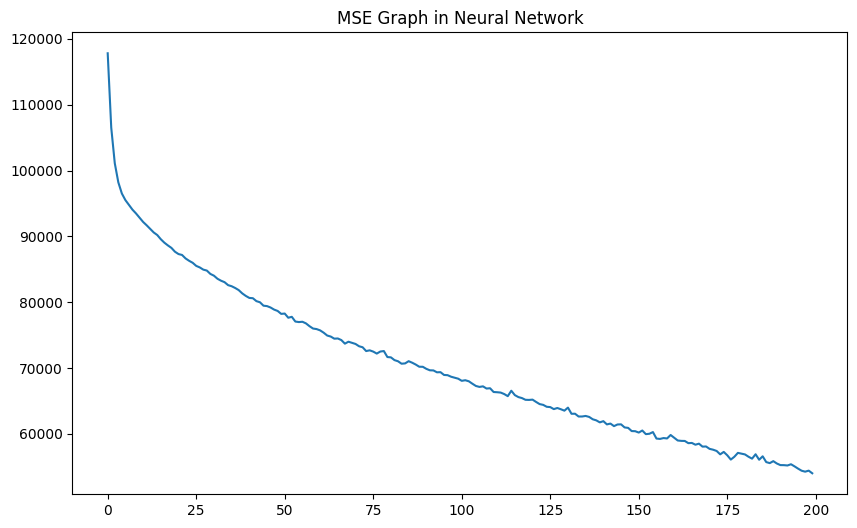

In [39]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.plot(hist.loss)
plt.title("MSE Graph in Neural Network")
plt.show()

In [40]:
y_train_nn = model.predict(X_train) # Y of NN train
y_test_nn = model.predict(X_test) # Y of NN test

mse_nn = mean_squared_error(y_test, y_test_nn)
mae_nn = mean_absolute_error(y_test, y_test_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_test_nn)

print("Mean Squared Error: {}".format(mse_nn))
print("Mean Absolute Error: {}".format(mae_nn))
print("Root Mean Absolute Error: {}".format(rmse_nn))
print("R2 score: {}".format(r2_nn))

300/300 [==============================] - 1s 4ms/step
Mean Squared Error: 79085.54002576007
Mean Absolute Error: 91.22478495401523
Root Mean Absolute Error: 281.2215141587856
R2 score: 0.07495775191812248


In [41]:
result_matric("Bi-LSTM",y_train_nn,y_test_nn)

Algorithm  Mean absolute error (MAE) : Train  \
0   Bi-LSTM                           59.13808   

   Root mean squared error (RMSE) : Train  R-square score (R^2) : Train  \
0                              235.111401                     -1.031607   

   Mean absolute error (MAE) : Test  Root mean squared error (RMSE) : Test  \
0                         91.224785                             281.221514   

   R-square score (R^2) : Test  
0                    -1.735088